# Lecture 4: Visualizations and Data Cleaning

## 10/11/22

### Table of Contents
1. [Types of Variables](#typesofvariables)
2. [Matplotlib vs. Seaborn](#pltvssns)
4. [Data Loading](#data-loading)  
5. [Exploratory Data Analysis (EDA)](#eda)
6. [Data Cleaning and Feature Engineering](#feature-engineering)
7. [References/Resources](#ref)

### Hosted by and maintained by [SAAS](https://saas.berkeley.edu/).

### Presented by Carlos Gonzalez, Claire Mai

In [1]:
# initial
# Setup code
import seaborn as sns #; sns.set()
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

`%matplotlib inline` makes it so that all the plots will be shown underneath the code, otherwise we'd have to type `plt.show()` after each plot.

<a id='typesofvariables'></a>
# Types of Variables

Understanding what types of data you're working with—and hence what types of variables your data has—is essential when determining what kinds of visualizations may be most appropriate and most effective to illustrate your data. Not all visualizations are suited for all types of data! It is also important to understand the types of variables in your dataset when considering what specific goal(s) you want to accomplish with your visualizations; this concept will become more clear as we continue through this lecture notebook.

There are two principal categories of data, each of which can be subdivided into two subcategories; this gives us four main categories of data in total:

- **Qualitative/Categorical**: a variable that has discrete values or distinct characteristics that represent *categories*
    - **Ordinal**: a categorical variable whose categories have a clear *ordering* or sequence, so the categories have a numerical or sequential meaning. 
        - e.g. education level: `elementary school`, `middle school`, `high school`; year in Berkeley: `freshman`, `sophomore`, `junior`, `senior`
    - **Nominal**: a categorial variable whose categories exist by *name* only, with no inherent numerical value or sequential ordering
        - e.g. `Cal ID number`; major at UC Berkeley: `data science`, `statistics`, `computer science`, `economics`
- **Quantitative/Numerical**: a variable that is measured on a numeric scale
    - **Continuous**: a quantitative variable that can take on an infinite number of values; think of continuous quantitative variables as things you can measure.
        - e.g. `weight`, `temperature`
    - **Discrete**: a quantitative variable that can only take on certain values, usually integer values; think of discrete quantitative variables as things you can count.
        - e.g. `number of siblings`, `number of semesters completed at UC Berkeley`

<a id='pltvssns'></a>
# Matplotlib vs Seaborn

- [Matplotlib](https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html ) is a Python data visualization library built on NumPy arrays
- [Official Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- Seaborn is based off the Matplotlib library, but is used to create more aesthetic and informative graphics
- Matplotlib mostly plots basic fundamental visualizations, whereas seaborn has the capacity to plot more advanced visualizations that can summarize data with distributions and densities 
- When it comes to more advanced data visualizations, seaborn creates more aesthetic graphs (e.g. often has built-in functionality for color-coding certain categorical variables)

Throughout this notebook, we'll mainly be dealing with seaborn. In practice though, the choice is up to you!

The data we are exploring is collected from a bike sharing system in Washington D.C.

In [2]:
# Our dataset 

bike = pd.read_csv('bikeshare.txt')
bike.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered 

Try to identify what type of variable each of the columns (except `instant`) in our dataset represent.

**Question 1:** What kind of variable would "dteday" be?

a) Qualitative Ordinal

b) Qualitative Nominal

c) Quantitative Continuous 

d) Quantitative Discrete 

**Answer:** ... 

**Question 2:** What kind of variable would "month" be?

a) Qualitative Ordinal

b) Qualitative Nominal

c) Quantitative Continuous 

d) Quantitative Discrete 

**Answer:** ... 

A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `bikeshare.txt` unmodified.

In [3]:
# Cleaning the dataset 

factor_dict = {
    'holiday': {
        ...
    },
    'weekday': {
        ...
    },
    'workingday': {
        ...
    },
    'weathersit': {
        1: 'Clear',
        2: 'Mist',
        3: 'Light',
        4: 'Heavy'
    }
}

In [4]:
bike.replace(factor_dict, inplace=True)
bike.head()

TypeError: If a nested mapping is passed, all values of the top level mapping must be mappings

In [ ]:
daily_counts = (
    bike
    .groupby(['dteday'])
    .agg(
        {
        "casual": sum, 
        "registered": sum, 
        "workingday": 'last'
        }
    )
)
daily_counts.head()

<a id='note'></a>
## A Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

<a id='lineplots'></a>
## Lineplots

One of the most fundamental types of plots is a lineplot. Lineplots are used to visualize relationships between **one numerical variable** on the y-axis and **one ordinal variable** on the x-axis. A lineplot consists of data points, often called *markers*, that are plotted on an *x,y* coordinate plane with straight lines connecting one point to the next. Often, lineplots are used to illustrate a trend in data values over a series of time, and hence the line follows chronological order from left to right; more specifically this plot would be called a *time series* plot.

<a id='pltlineplots'></a>
### Lineplots in Matplotlib
[Lineplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) are the simplest, most basic type of data visualization that you can plot in Matplotlib. They are created using the `plt.plot()` function, whose argument is just some data that we want to visualize! This data can be in the form of a NumPy array or a Python list.

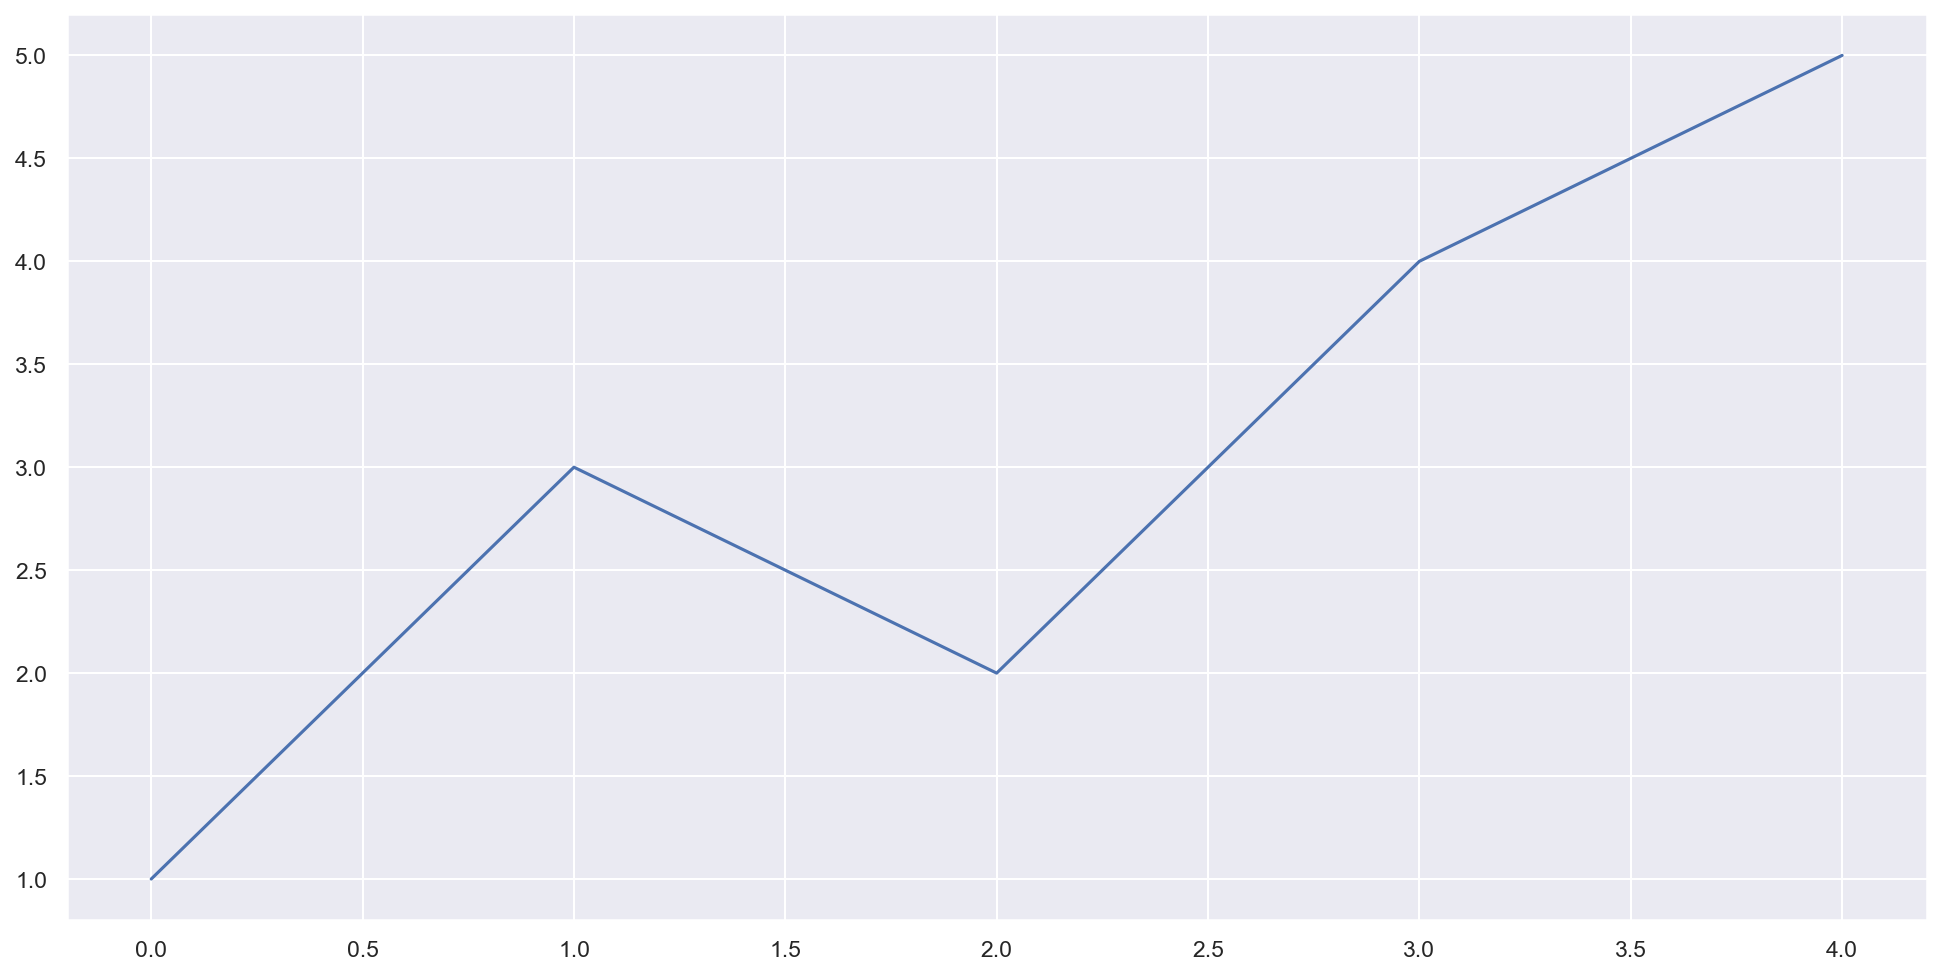

In [5]:
# Run this cell to see one way how `plt.plot()` works!
plt.plot([1, 3, 2, 4, 5])
plt.show()

In the cell above, the list `[1, 3, 2, 4, 5]` that we passed into the `plt.plot()` function, because it is the only data argument, is assumed by Matplotlib to be a list of the y-values. Hence, it automatically assigns the integers `[0, 1, 2, 3, 4]` to be the x-values. When you plot values in this way, it will automatically assign x-values as a range from 0 up to the length of the y-values you passed in. 

If you want to define the x-values, you can just pass them in as the first argument, so you have the option of calling plot in either of the following ways:
    
    plt.plot(y_values)
    plt.plot(x_values, y_values)
    
**Pro-tip:** After typing `plt.plot()` into a Jupyter Notebook code cell, you can use the `shift+tab` trick to see what arguments `plt.plot()` takes in.

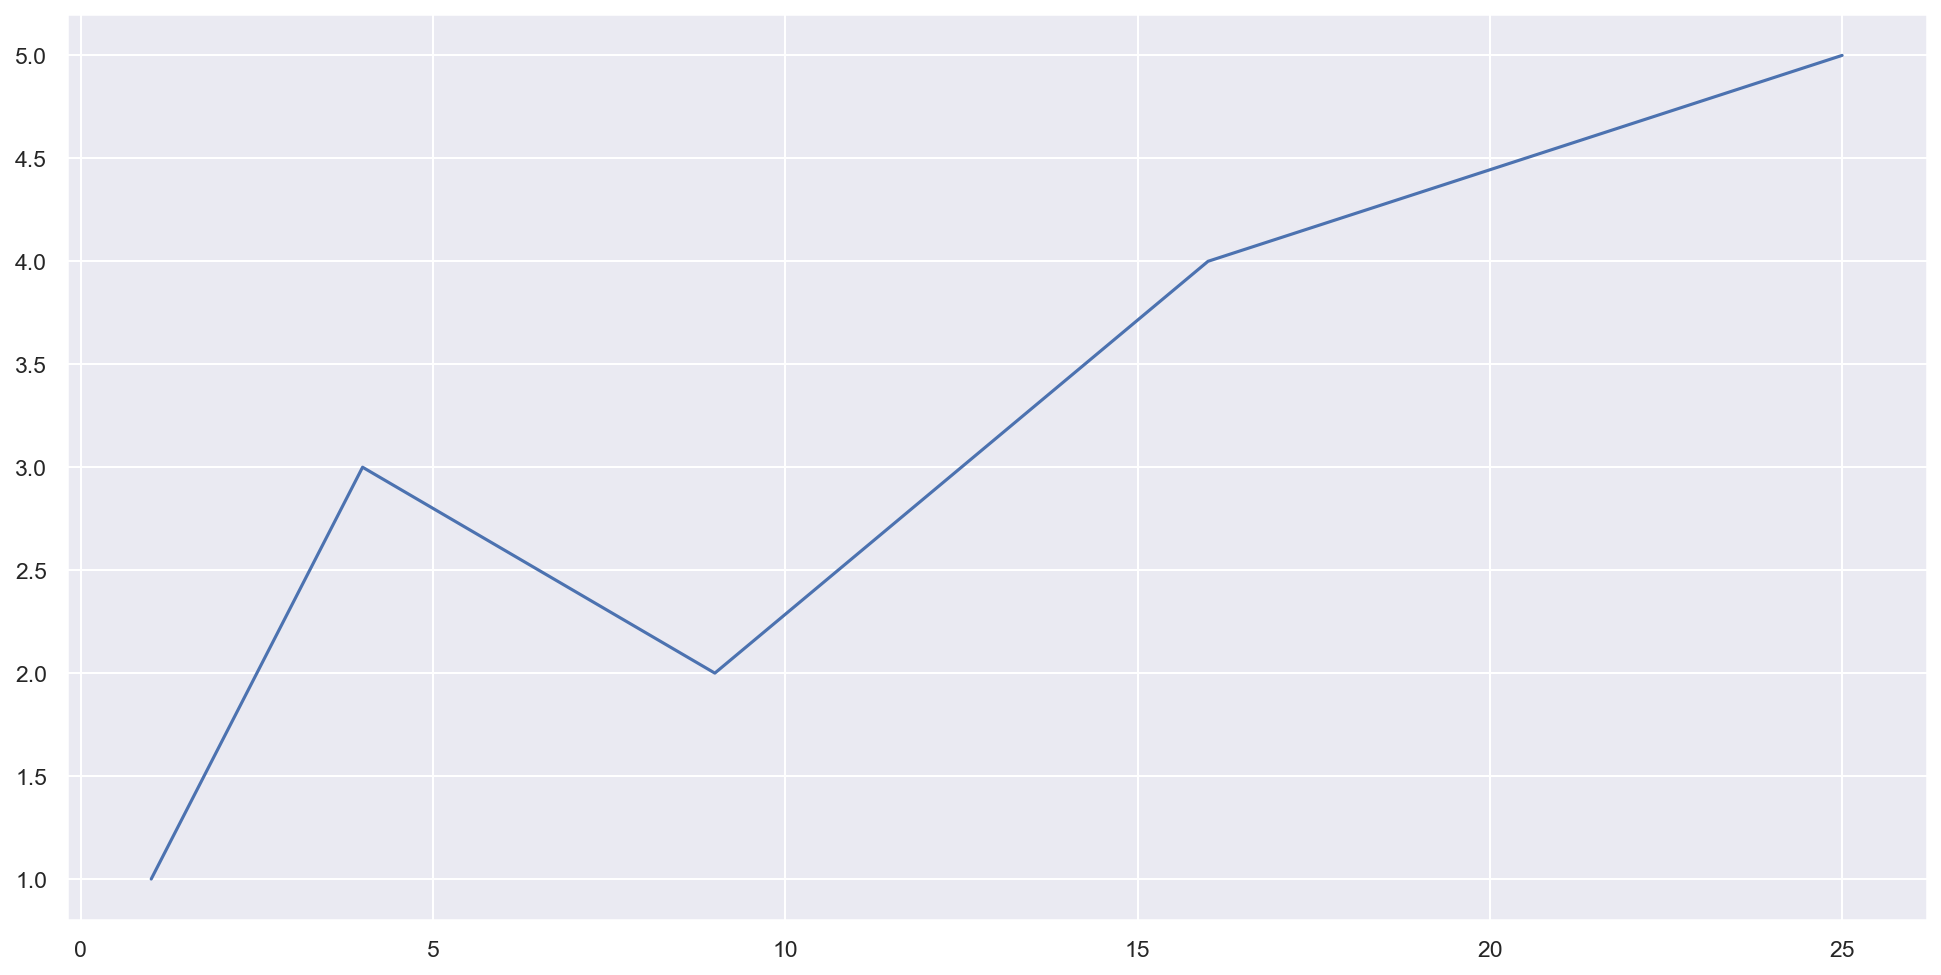

In [6]:
# Run this cell to see how we can pass in `x_values` and `y_values` into `plt.plot()`
plt.plot([1, 4, 9, 16, 25], [1, 3, 2, 4, 5])
plt.show()

**Practice:** Use the `bike_hr_avg_counts` dataframe below to plot the average number of **registered** bikeshare riders per hour of the day. Label your axes and add a title. Feel free to visually customize your plot in any other way that you wish with tick marks, colors, marker styles, and line styles of your choice.

In [7]:
bike_hr_avg_counts = bike[["hr", "casual", "registered"]].groupby("hr").agg(np.mean).set_index(np.arange(0,24))
bike_hr_avg_counts["hr"]=np.arange(1,25)
bike_hr_avg_counts.head()

,casual,registered,hr
0,10.158402,43.739669,1
1,6.504144,26.871547,2
2,4.772028,18.097902,3
3,2.715925,9.011478,4
4,1.253945,5.098996,5


In [8]:
# Your code here
# Remember: One numerical variable on the y-axis and one ordinal variable on the x-axis.

**Analysis:** What does the plot you just made show us? What conclusions can we draw?

*Write description here ...*

**Challenge:** Also using the `bike_hr_avg_counts` dataframe, plot the average number of casual riders per hour of the day and the average number of registered riders per hour of the day **on the same plot**. Make the `registered` rider plot red and make the `casual` rider plot blue.

In [9]:
# Your code here

**Analysis:** What does the plot you just made show us? What conclusions can we draw?

*Write description here ...*

<a id='snslineplots'></a>
### Lineplots in Seaborn
The function to create [Lineplots in Seaborn](https://seaborn.pydata.org/generated/seaborn.lineplot.html) follow a very similar to its Matplotlib counterpart in terms of its arguments. Like `plt.plot()` in Matplotlib, the arguments of `sns.lineplot()` can be either NumPy arrays or Python lists.

    sns.lineplot(x_values, y_values)
    
**Practice:** Recreate your lineplot of the average number of registered bikeshare riders per hour of the day, this time using Seaborn.

In [10]:
# Your code here

Something that's extra cool about using Seaborn is that in some ways it is less verbose than Matplotlib. For example, in Matplotlib we would have to specify our x-values as `bike_hr_avg_counts["mnth"]` and our y-values as `bike_hr_avg_counts["cnt"]`. However, because our list of x-values and our list of y-values come from the same dataframe, Seaborn can make this more concise with the following syntax:

    sns.lineplot(data=dataframe_name, x="x_values", y="y_values")
    
Note that the `data` argument is the name of your dataframe, while `x` and `y` are strings that are the column names of the `x` and `y` variables you want to plot. This code is more readable and concise than the previous syntax because it specifies the dataframe name only once, since repeating the dataframe name in `sns.lineplot(bike_hr_avg_counts["hr"], bike_hr_avg_counts["registered"]`, for example, can be redundant.

**Practice:** Recreate your **overlaid** lineplot that includes the plot of both average number of registered riders per hour of the day and casual riders per hour of the day, but this time using this cool new Seaborn syntax! 

In [11]:
# Your code here

Plotting lineplots in Seaborn also has some other useful and cool features. For example, the lineplot we've been creating has been from data that has one singular count value per one singular month value. Run the following code to see how Seaborn can plot the a similar lineplot to our previous visualization of the average number of registered riders per hour of the day: here we call upon the original `bike` dataframe, but this time our visualization includes new interesting information about our data.

<AxesSubplot:xlabel='hr', ylabel='registered'>

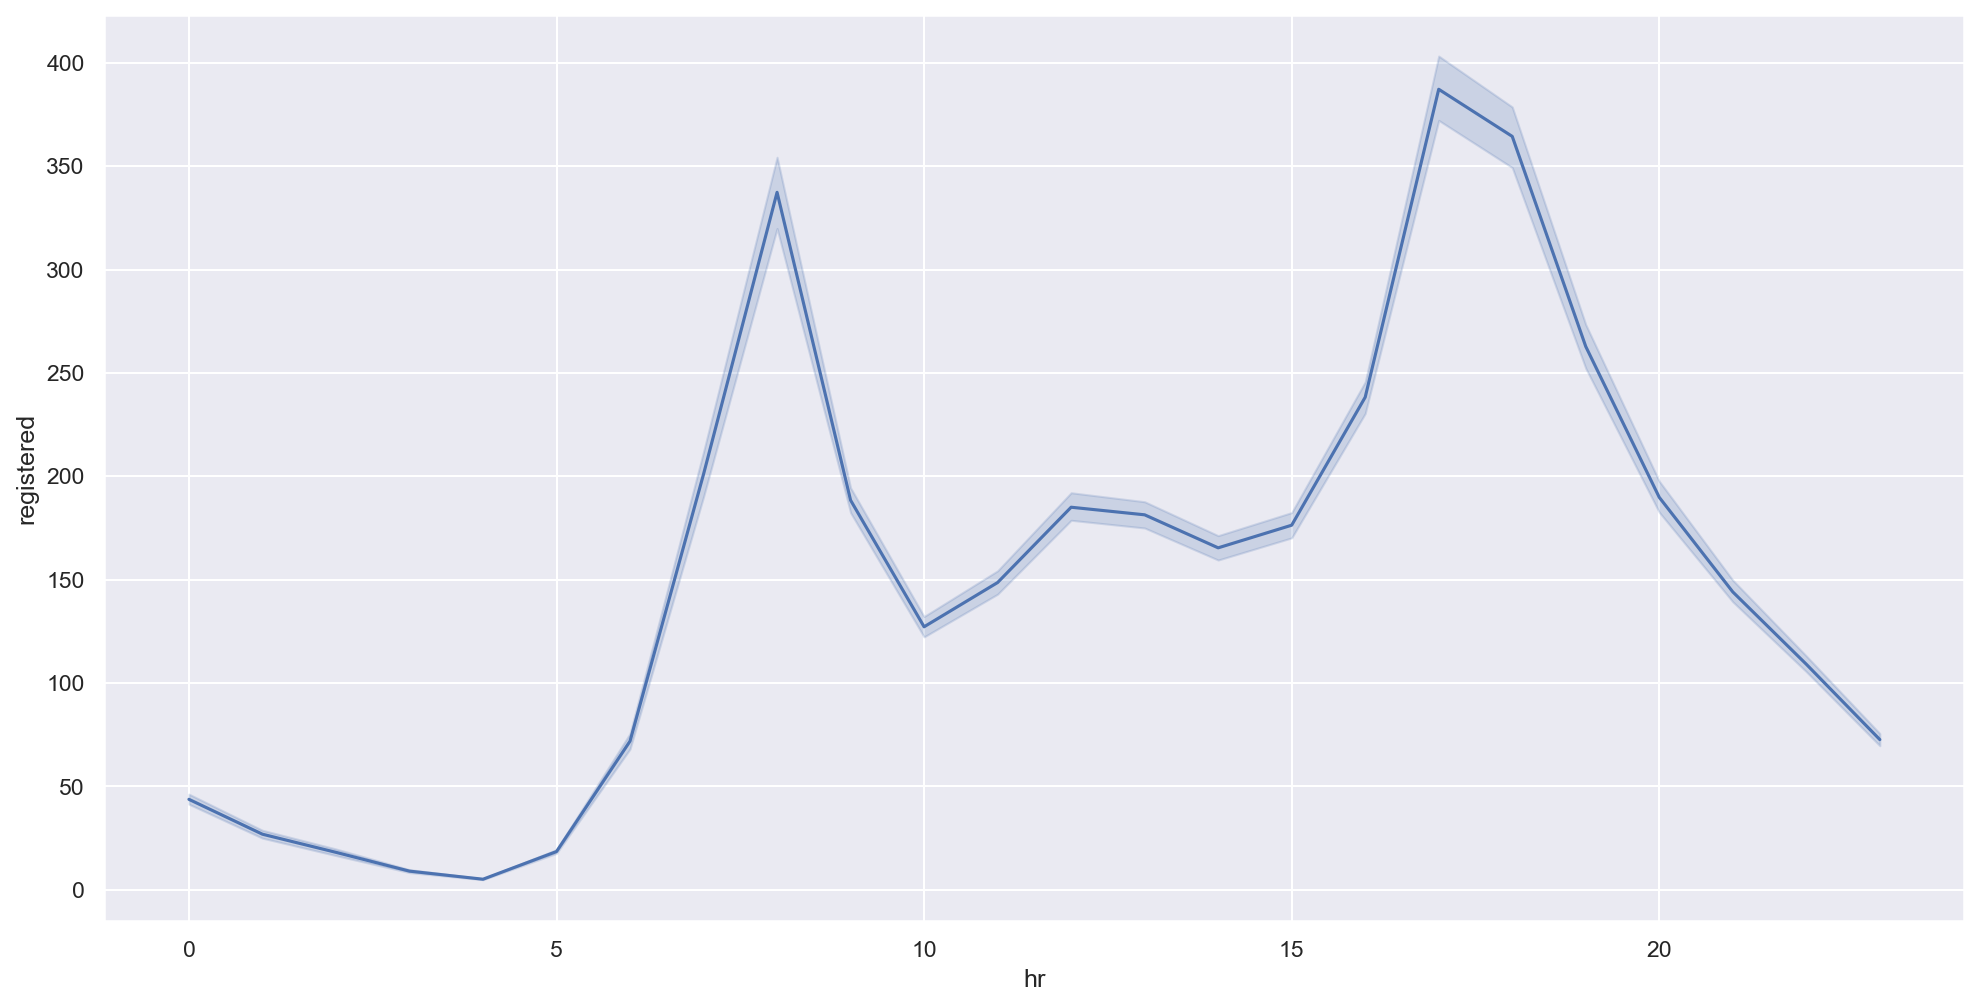

In [12]:
sns.lineplot(data=bike, x="hr", y="registered")

Notice that the lineplot itself is the same, but now there is a lightly shaded region surrounding it. This region represents the spread or variability of the y-values at every x-value point, while the solid line represents the "middle" or average y-value per x-value. The larger the light shaded area, the greater spread or variability the y-values have at that particular given x-value.

<a id='snshue'></a>
### `Hue` in Seaborn
`sns.lineplot()` also has the optional argument `hue` which is set to a column name in your dataframe that you want to color code; generally you want to color code according to some type of categorical variable.

For example, we can color code our plot of average number of registered riders per hour of the day according to the variable `workingday`. We do this by setting `hue="workingday"` within the `sns.lineplot()` function. The result is an overlaid lineplot: one plot represents average number of registered riders per hour of the way on working days (`workingday=1`), and the other represents average number of registered riders per hour of the way on non-working days (`workingday=0`).

**Note that the `hue` argument is not limited to only `sns.lineplot()`.** It can be used for many many other Seaborn plots too!

<AxesSubplot:xlabel='hr', ylabel='registered'>

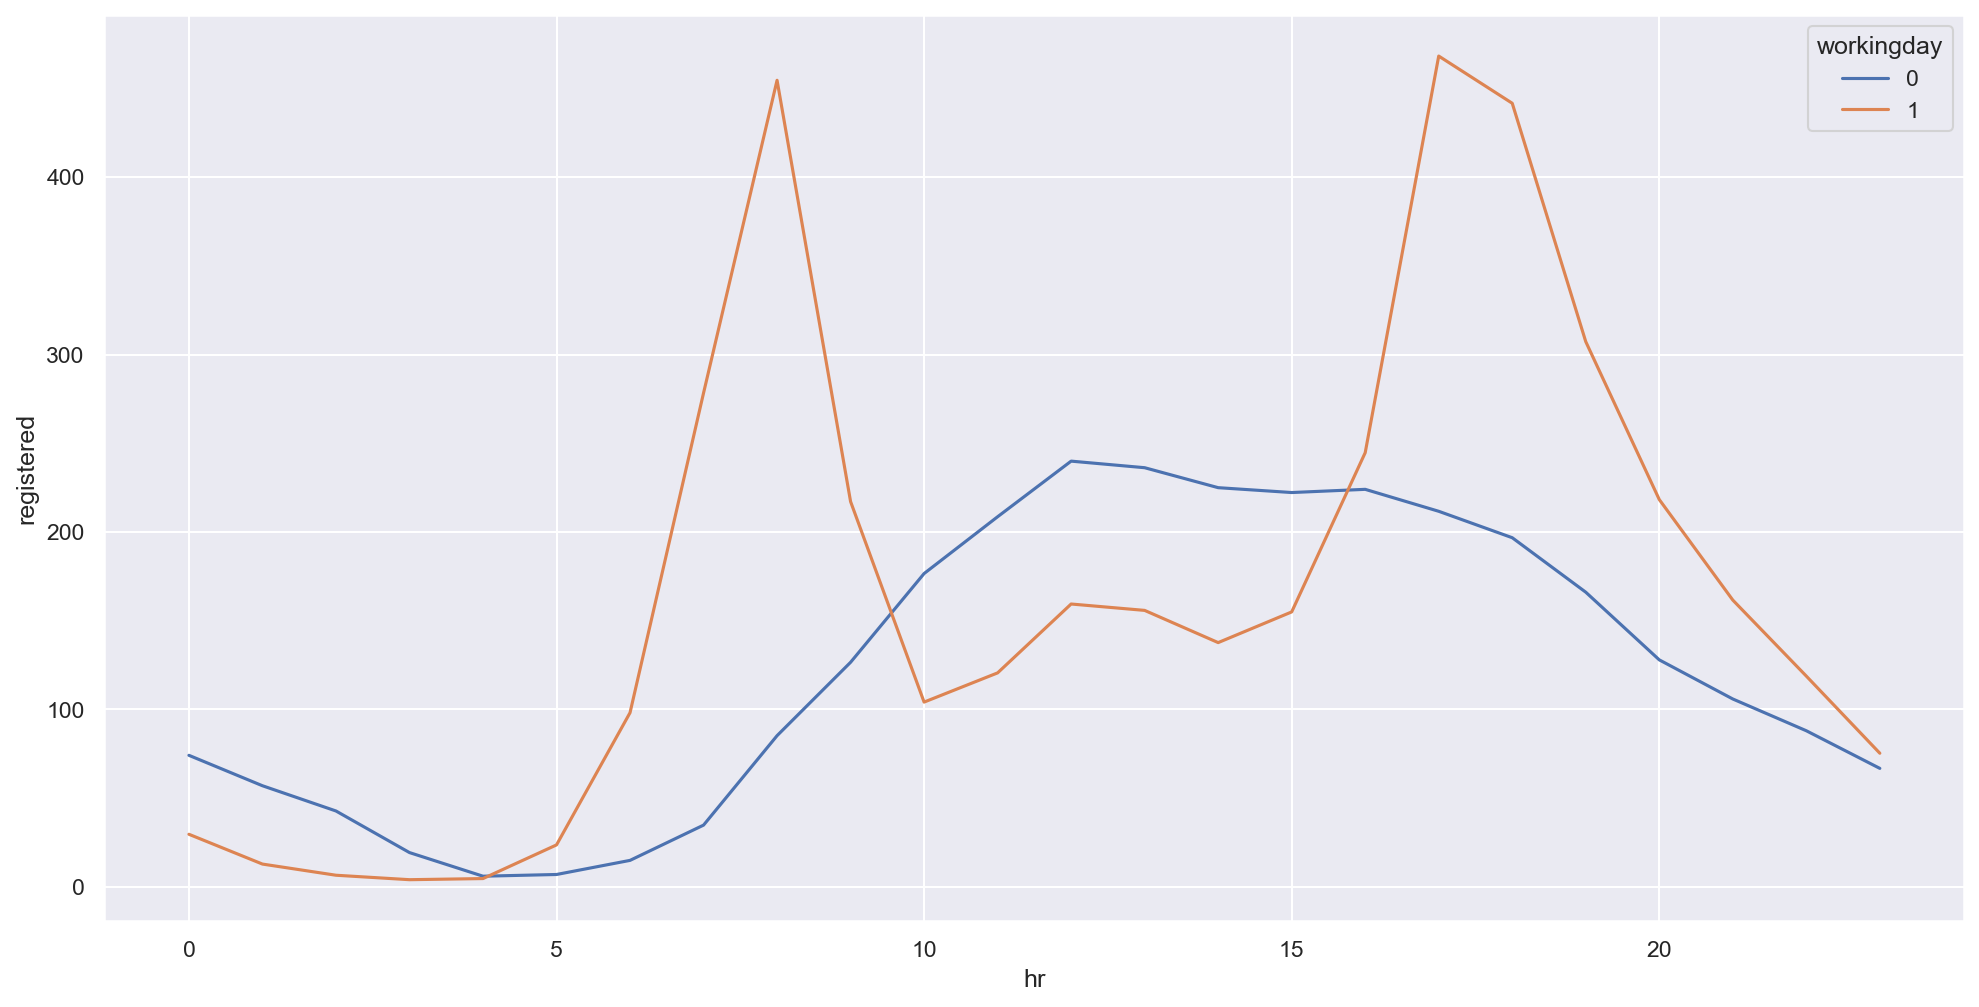

In [13]:
sns.lineplot(data=bike, x="hr", y="registered", hue="workingday", ci=None)

<a id='barplots'></a>
## Bar Plots

Barplots show the relationship between a numerical and a categorical variable. Each bar is a different category and the height of each bar is the numerical value.
- Matplotlib documentation for [bar plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)
- Seaborn documentation for [bar plots](https://seaborn.pydata.org/generated/seaborn.barplot.html)

Text(0.5, 1.0, 'Total Number of Bike Rides for Each Weather Condition')

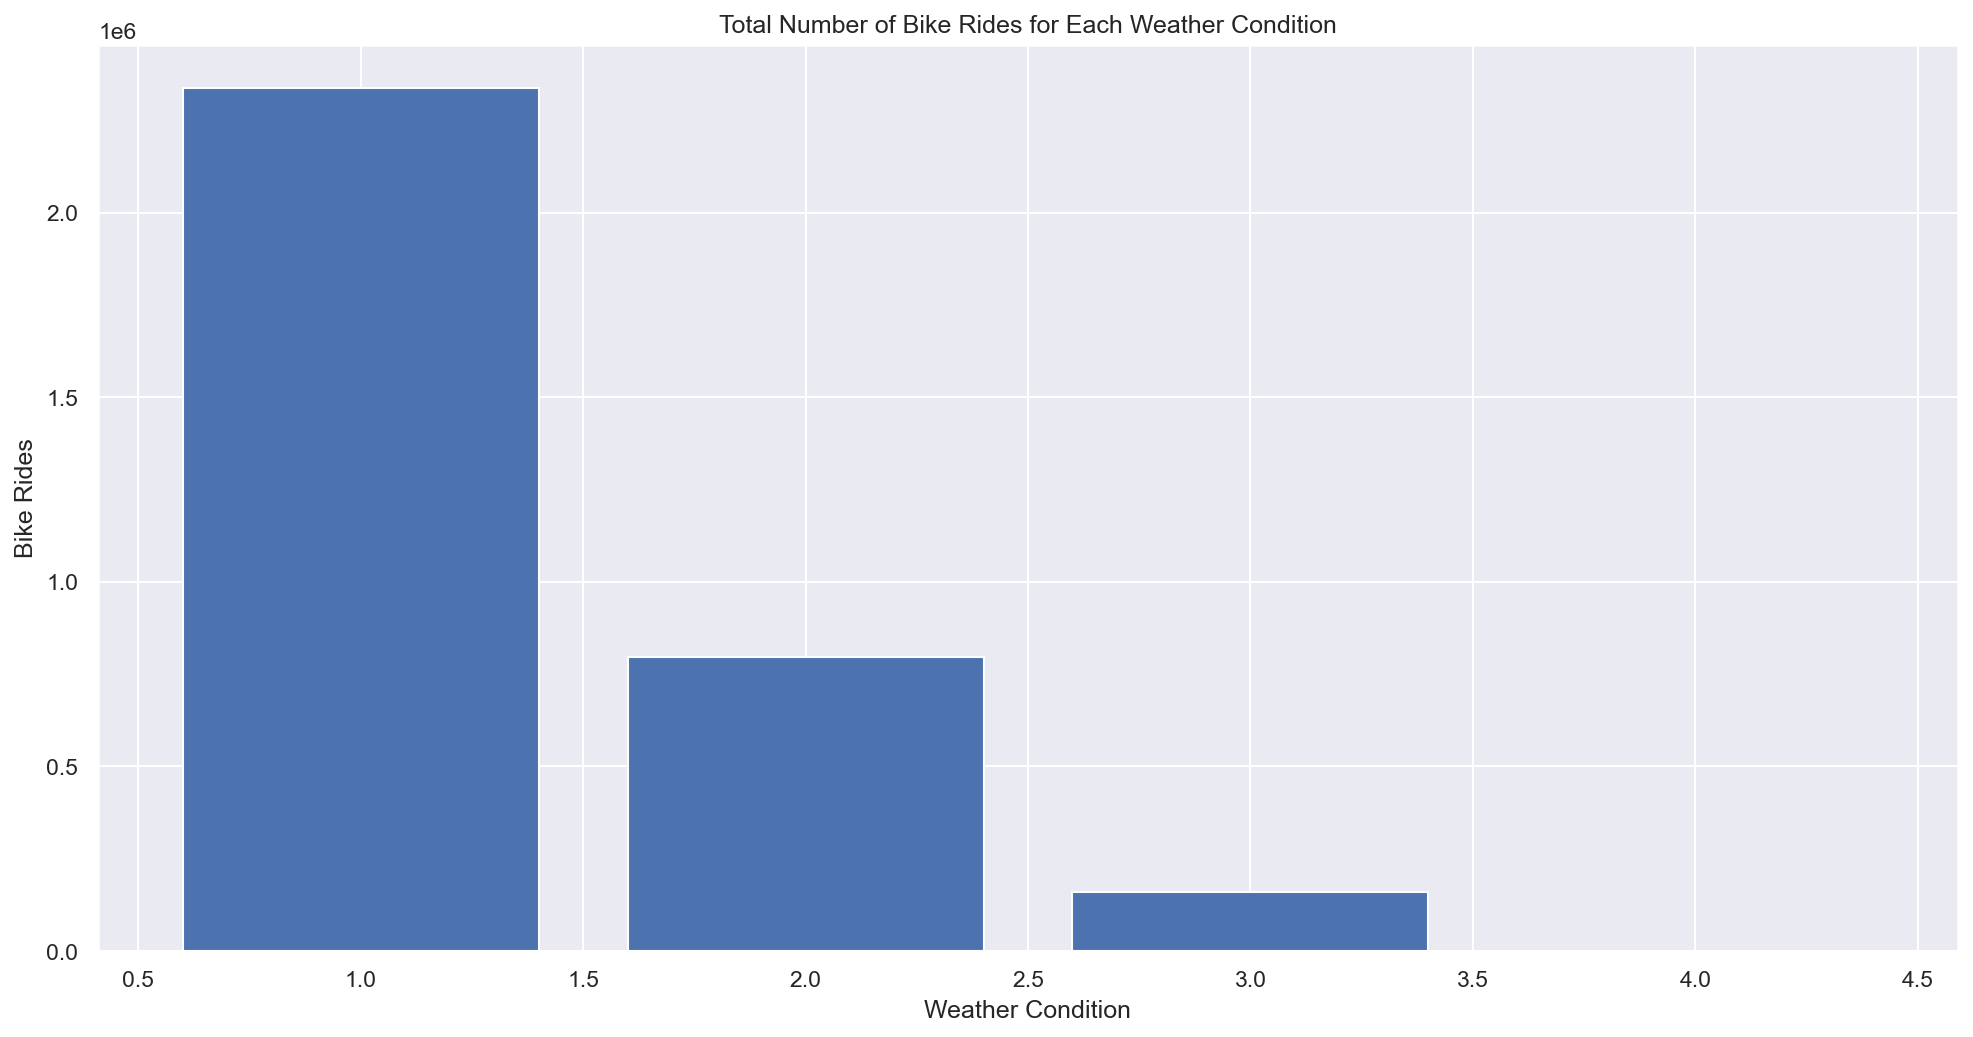

In [14]:
# Matplotlib

# This groups the bike sharing dataset by the column "weathersit" and sums the rest of the columns. 
# Why do we want to sum instead of just calling count?

weather = bike.groupby("weathersit").sum()
plt.bar(x = weather.index, height = weather['cnt']);
plt.xlabel("Weather Condition")
plt.ylabel("Bike Rides")
plt.title("Total Number of Bike Rides for Each Weather Condition")

Text(0.5, 1.0, 'Total Number of Bike Rides for Each Weather Condition')

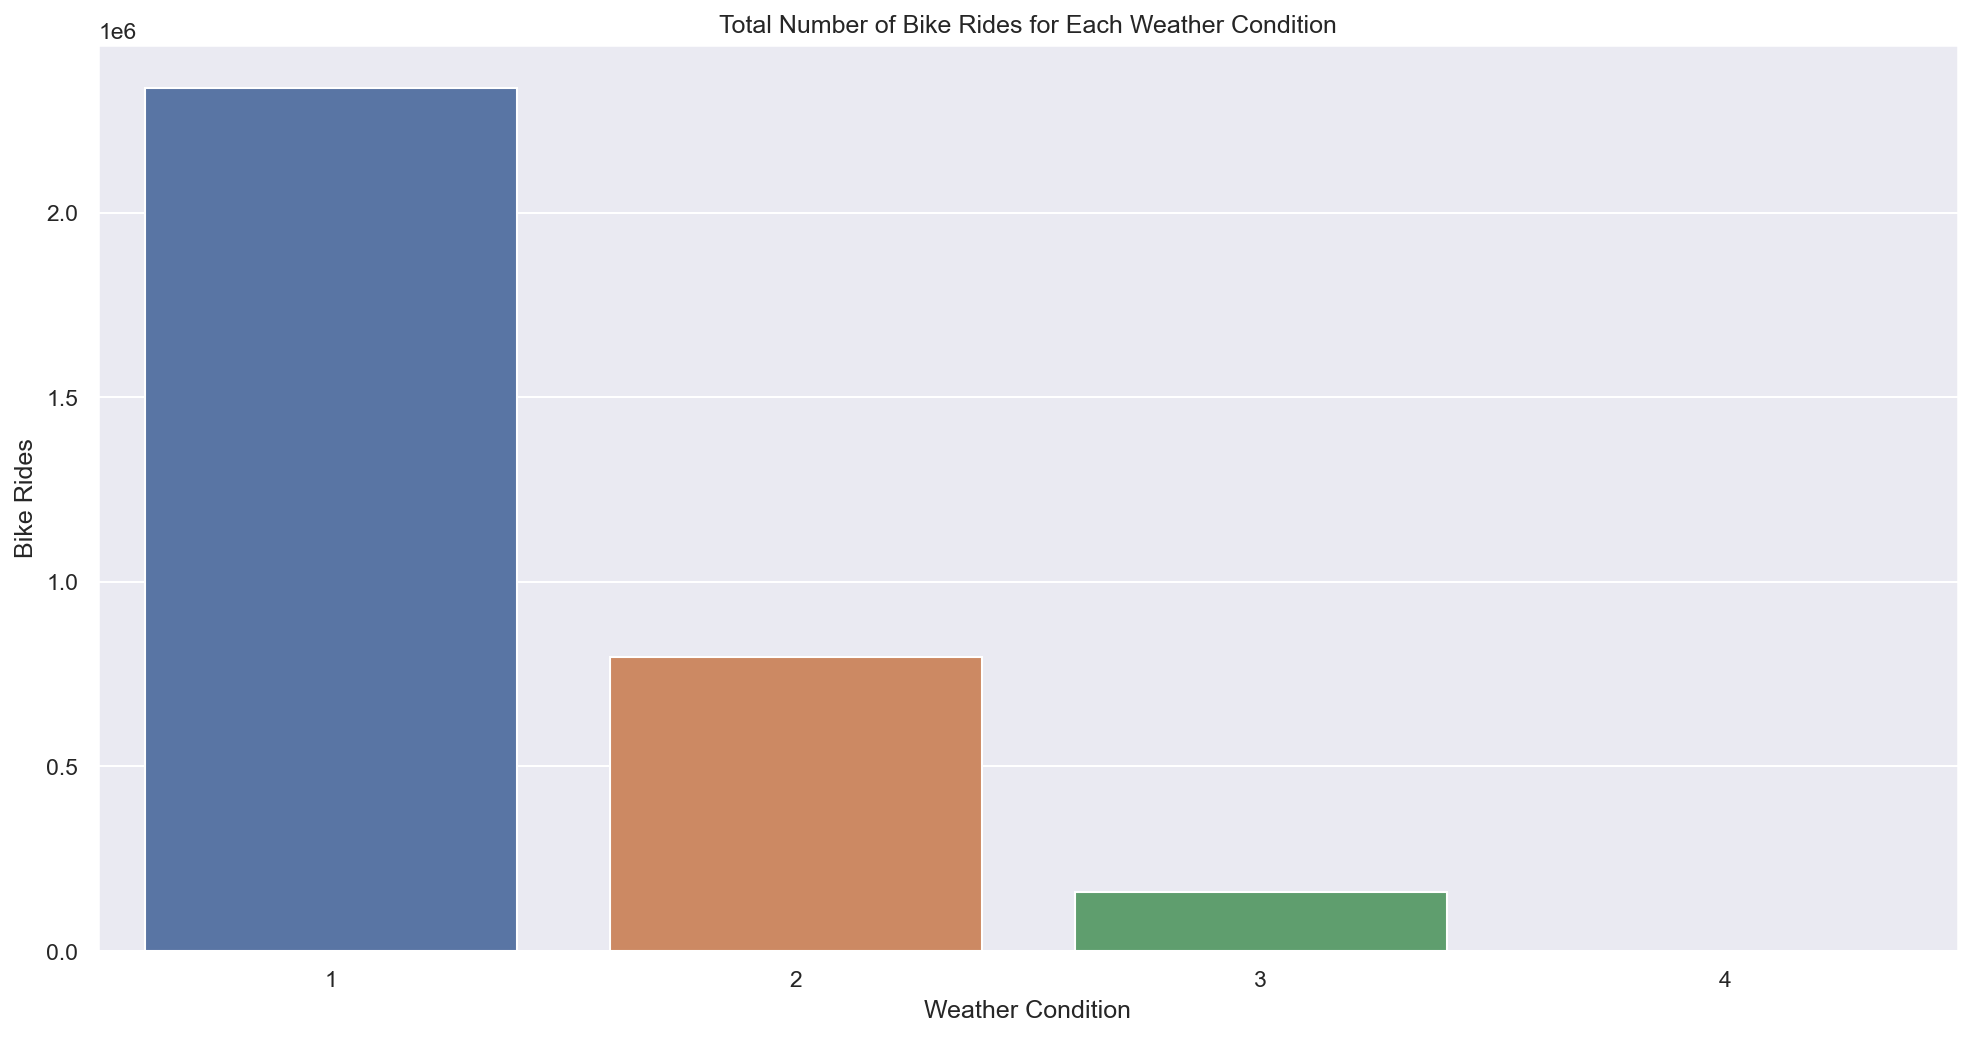

In [15]:
# Seaborn
sns.barplot(x = weather.index , y = 'cnt', data = weather);
plt.xlabel("Weather Condition")
plt.ylabel("Bike Rides")
plt.title("Total Number of Bike Rides for Each Weather Condition")

**Analysis:** What does the plot you just made show us? What conclusions can we draw?

*Write description here ...*

**Practice:** Now try making a barplot in either Matplotlib or Seaborn that shows the total number of bike rides for each day of the week.

In [16]:
grouped_days = bike.groupby('weekday').sum()
grouped_days
# Your code below

,instant,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,,,
0,21761347,6231,1271,16231,28911,0,0,3408,1210.52,1164.6976,1571.24,470.6084,140521,303506,444027
1,21432775,6169,1244,16062,28649,357,2122,3548,1227.22,1179.7755,1575.78,468.1913,70784,384719,455503
2,21257281,6204,1231,15986,28509,23,2430,3621,1247.52,1195.0513,1569.51,470.7732,57843,411266,469109
3,21541366,6214,1246,16196,28530,24,2451,3677,1254.02,1196.7316,1595.93,463.2512,57319,415729,473048
4,21595502,6231,1246,16284,28555,48,2423,3465,1252.84,1198.4877,1506.39,474.4004,61460,423935,485395
5,21700913,6207,1248,16399,28670,48,2439,3512,1234.62,1173.4364,1526.62,463.6522,78238,409552,487790
6,21734326,6220,1248,16462,28847,0,0,3539,1210.40,1160.3154,1555.14,492.8296,153852,323955,477807


**Check-in Question:** Why are we using bar plot? What is the numerical variable and what is the categorical variable?

<a id='scatterplots'></a>
## Scatterplots

Scatterplots are used to visualize relationships between **two numeric variables**, particularly if both of them are continuous numeric. A scatterplot consists of data points, or *markers*, that are plotted on an *x,y* coordinate plane. Each data point represents a single observation from a dataset and is characterized by two variables, one mapped to the x-axis and the other mapped to the y-axis.

However, unlike a lineplot, in a scatterplot there is not only one marker per x coordinate -value, and line segements do not connect each marker. Hence, a scatterplot often resembles **a cloud of data points** that hopefully resemble some discernible trend that can be used to summarize some sort of relationship or correlation between the x-variable and the y-variable.

<a id='pltscatter'></a>
### Scatterplots in Matplotlib
[Scatterplots in Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter) also have a similar function and argument structure as the lineplot function, `plt.plot()`. The function to make a scatterplot in Matplotlib is `plt.scatter()` which takes in the following essential arguments:

    plt.scatter(x_values, y_values)
    
Similar to `plt.plot()`, the `x_values` and `y_values` can be either in the form of NumPy arrays or Python lists.

**Practice:** Using the `bike` dataframe, make a Matplotlib scatterplot of the number of casual riders on the x-axis and the number of registered riders on the y-axis. Remember to label your axes and title your plot!

In [17]:
# Your code here

The resulting plot should generate a lot of questions. There seem to be two clouds of points that seem to both have an upward trend, but in different directions. How can we investigate this further? Luckily, the utilities of Seaborn can help us out!

<a id='snsscatter'></a>
### Scatterplots in Seaborn
Plotting [scatterplots in Seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) has some extra data visualization advantages that either Matplotlib doesn't have or can't easily accomplish. Take, for example, the `hue` argument. Maybe the divergence we see in the cloud of points in our scatterplot may be due to another variable. Let's see!

**Practice:** Recreate your scatterplot from above, but this time use Seaborn and set `hue` equal to `"workingday"`. How does this give us more useful information about the relationship between the number of registered riders and the number of casual riders?

The function and syntax to create a scatterplot is as follows. Again, you should notice that it is very similar to its Matplotlib counterpart, and the arguments are similar to the other data visualization functions that we have learned so far.

    sns.scatterplot(x_values, y_values, hue) 
    sns.scatterplot(data, x_values, y_values, hue) 
The first version of `sns.scatterplot()` has `x_values` and `y_values` as either NumPy arrays or Python lists. The second version of `sns.scatterplot()` has `data` set to the name of a dataframe, and `x_values` and `y_values` are set to strings that are the column names of the desired x and y variables.

In [18]:
# Your code here

**Analysis:** What does the plot you just made show us? What conclusions can we draw?

*Write description here.*

### Transformations

Sometimes our data is not linear, and we can perform transformations so the data will fit the linear model.
<img src='transformations.png' style='width: 400px'></img>

/var/folders/_w/hcnc2bbx46qb52cr07g3sykh0000gn/T/ipykernel_32144/3961504590.py:2: RuntimeWarning: divide by zero encountered in log
  y_1 = np.log(x_1)


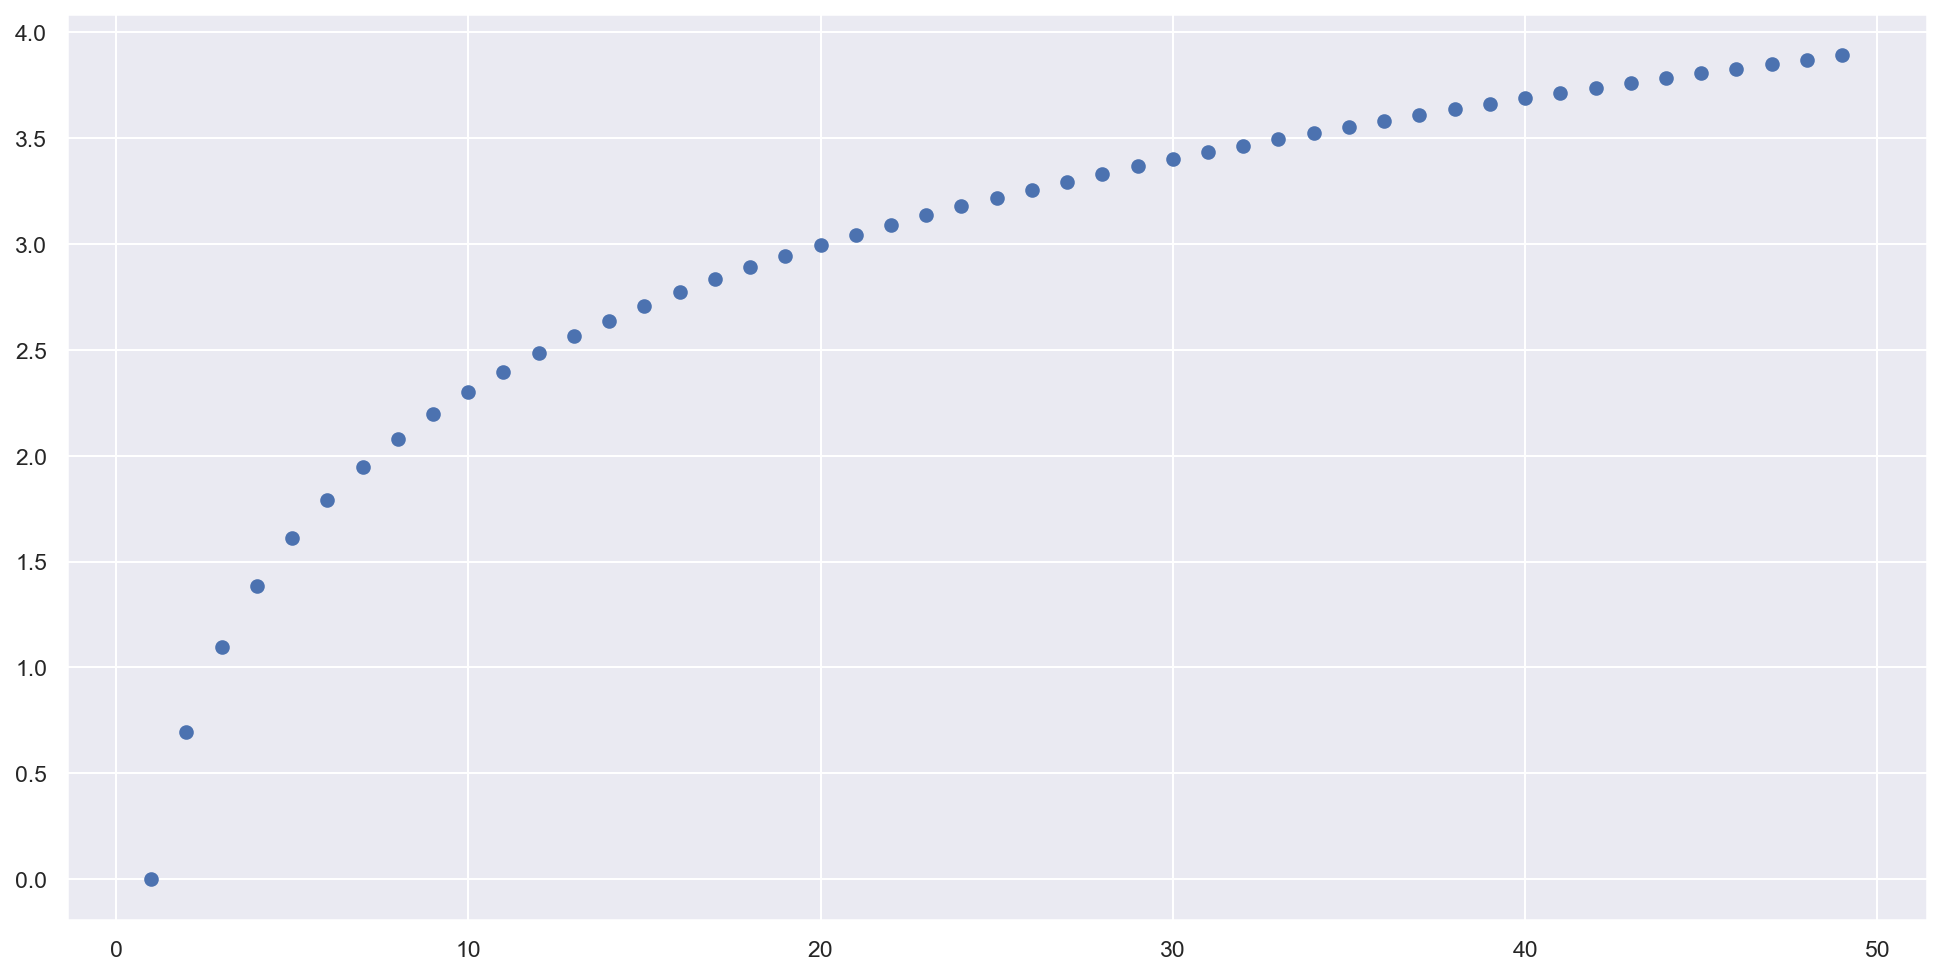

In [19]:
x_1 = np.arange(50)
y_1 = np.log(x_1)
plt.scatter(x_1,y_1);

/var/folders/_w/hcnc2bbx46qb52cr07g3sykh0000gn/T/ipykernel_32144/1922299643.py:1: RuntimeWarning: divide by zero encountered in log
  x_1_log = np.log(x_1)


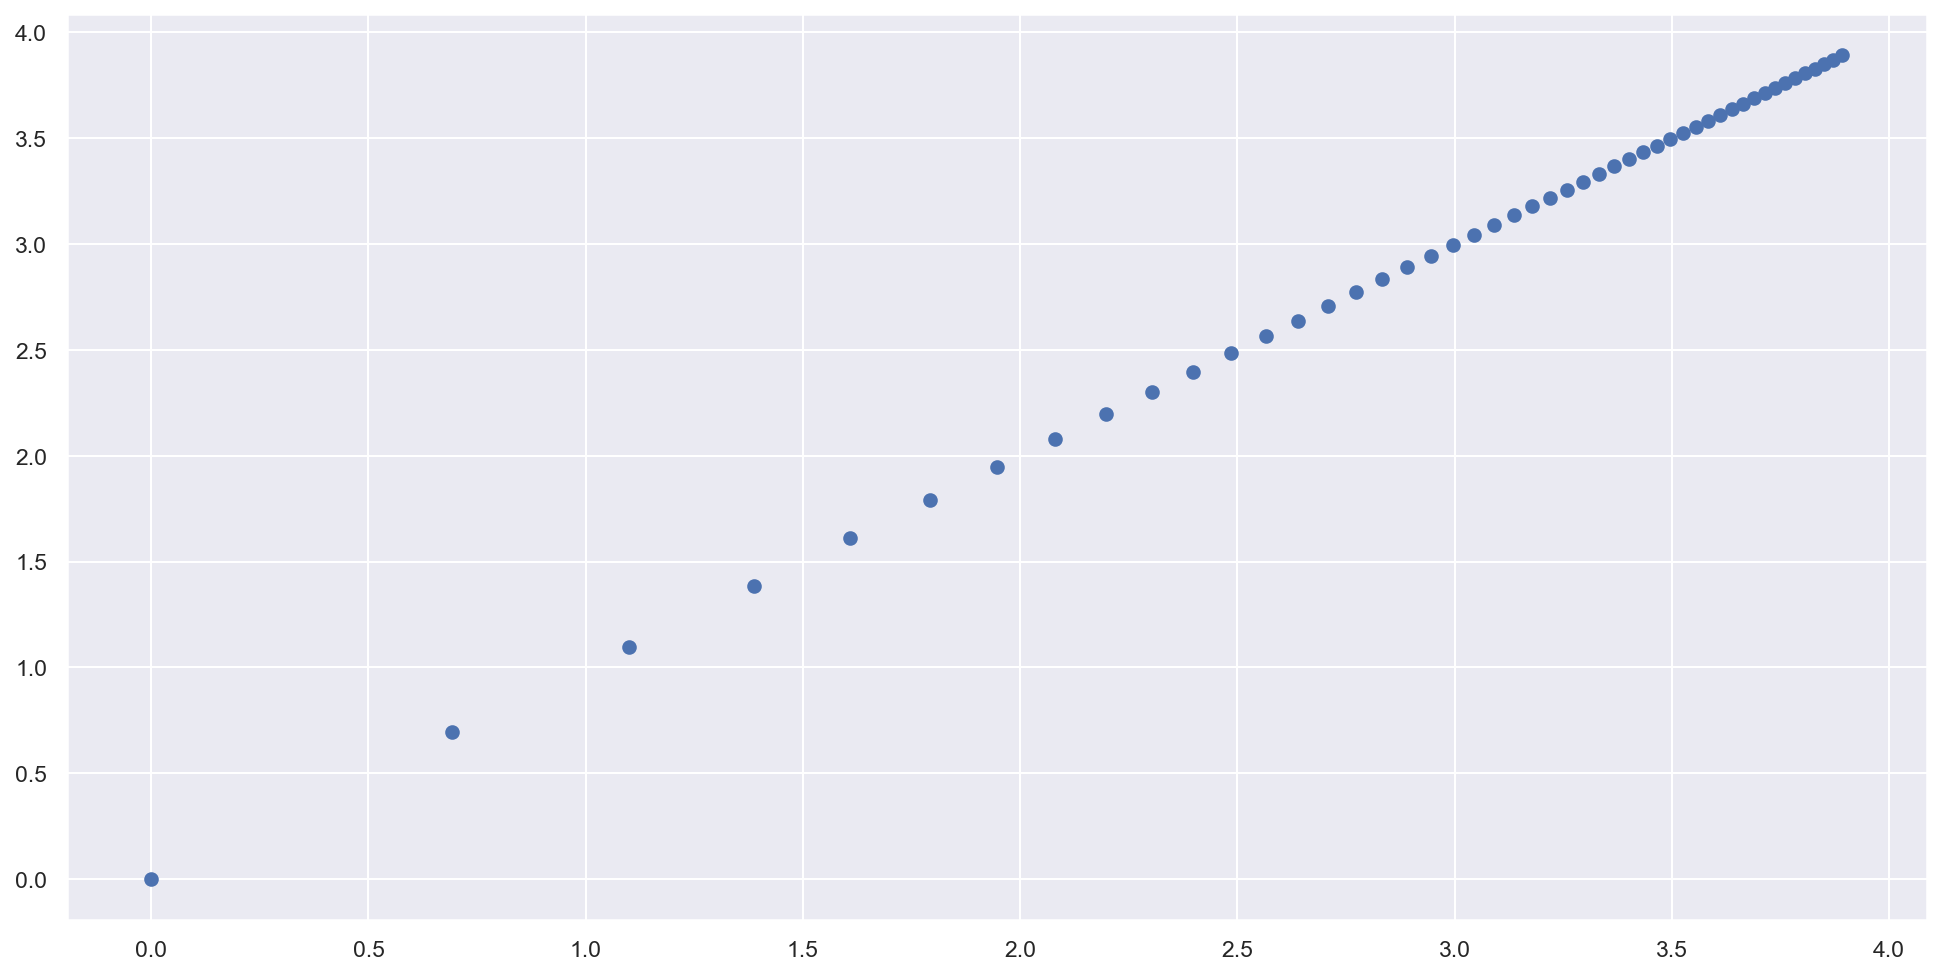

In [20]:
x_1_log = np.log(x_1)
plt.scatter(x_1_log,y_1);

<a id='histograms'></a>
## Histograms
- Histograms are charts that show the distribution of a numerical variable
- Histograms use bins (each bar is a bin)
- Bins can be of unequal widths 
- Binning counts the number of numerical values within each bin
- The x-axis is the numerical variable that we're observing
- The y-axis is a rate (e.g. % per year)
- The **area** of each bin (height * width) is the proportion of individuals in the dataset within that bin
- The total area of the distribution sums to 1
- Matplotlib documentation for [histograms](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
- Seaborn documentation for [histograms](https://seaborn.pydata.org/generated/seaborn.distplot.html)

**Useful resources:** 
- Data 8 [Slides](https://docs.google.com/presentation/d/1gak73b-xDk2VnQeS-MvEpTrxV1xPP5gy9g0nfiiBx5Q/edit#slide=id.g40eea6abfe_0_95)
- Data 8 [Textbook](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)

The function and syntax to create a histogram is as follows. Again, you should notice that it is very similar to its Matplotlib counterpart, and the arguments are similar to the other data visualization functions that we have learned so far.

    plt.hist(x_values, bins = n_bins)
    sns.distplot(x_values, bins = bins, kde = False)

In [21]:
daily_counts.head()

NameError: name 'daily_counts' is not defined

In [22]:
# Matplotlib
bins = np.arange(0, 3410 + 350, 350)
plt.hist(daily_counts['casual'], bins = bins)

NameError: name 'daily_counts' is not defined

In [23]:
# Seaborn
sns.distplot(daily_counts['casual'], bins = bins, kde = False)

NameError: name 'daily_counts' is not defined

In [24]:
sns.distplot(daily_counts['casual'], label='casual', kde = False)
sns.distplot(daily_counts['registered'],  label='registered', kde = False, color='green')
plt.legend()
plt.title("Distribution Comparison of Casual vs Registered Riders")
plt.xlabel("Rider Count")
plt.ylabel("Density");

NameError: name 'daily_counts' is not defined

**Practice:** Make a histogram showing the distribution of the total rider count.
*Hint: Create a new column for the total rider count*

In [25]:
#Your code here

<a id='boxandviolin'></a>
## Box Plots 
- Matplotlib [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)
- Seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [25th percentile], median, third quartile [75th percentile] and “maximum”). Boxplots can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

In [26]:
plt.boxplot(daily_counts[["casual", 'registered']].values, labels = ["Casual", "Registered"]);
plt.ylabel("Rider Count")
plt.title("Distribution of Casual and Register Rider Counts")

NameError: name 'daily_counts' is not defined

**Practice:** Try making a boxplot below of the distribution of registered riders. Don't forget your labels and titles!

In [27]:
# Your code here

<a id='piechart'></a>
## Pie Charts
- Matplotlib [documentation](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)

Pie charts show the distribution of categorical data. Bar charts are also used to display categorical data, particularly counts (ie what percentage of our data has property X). Pie charts are best used for counts of categorical variables without a high number of categories. It's best practice to always include the label and percent corresponding to the category when displaying a pie chart, which matplotlib will do for you with the autopct argument.

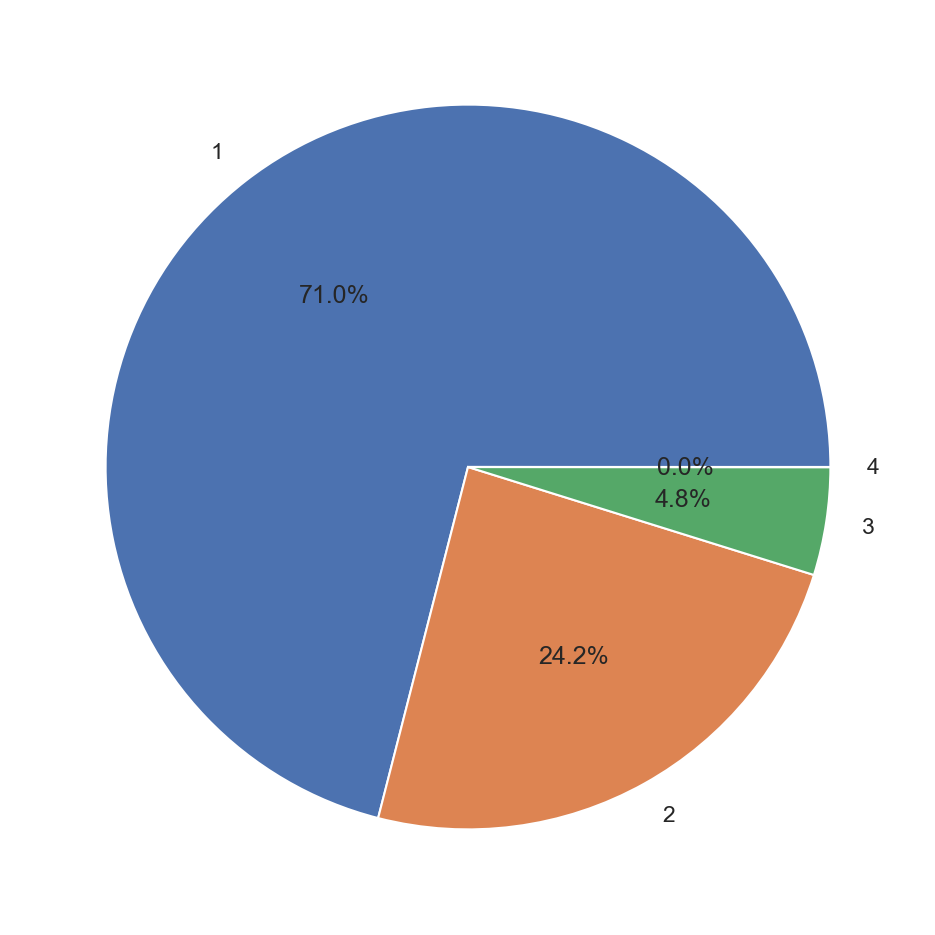

In [28]:
plt.pie(weather['cnt'], labels=weather.index, autopct='%1.1f%%');

Data scientists typically steer away from pie charts, as humans are pretty bad at interpreting data when it comes to area, and so bar charts or alternative data visualization approaches are better. See [article](https://about.infogr.am/blog/do-this-not-that-pie-charts/) that goes over why pie charts aren't typically used and common alternatives.

<img src='pie.png' style='width: 600px'></img>

# Titanic data set
<a id='data-loading'></a>
#### Data Loading

Given the test and training data are in the titanic folder and are named "train.csv", "test.csv" respectively, please fill in the lines below to properly load the titanic dataframes. <br> <br>
What is the file type for these data sets?

In [29]:
titanic_train = ...

**Other Data Formats** <br> <br>
In some cases, data is not stored as a .csv file. Here are some ways to work with other common data formats. <br>
<br>**TSV (Tab Separated Value):** Exactly like a .csv, except tabs separate values instead of commas. To read in a .tsv in pandas, use pd.read_csv('filename.csv', sep='\t')<br>
<br>**JSON (JavaScript Object Notation):** Data is stored as a set of nested arrays and dictionaries. An example of when you might work with JSON data is if you use an API (e.x. Yelp, Google, ..) to retrieve information from another website.

|     column name     |     description     |
|-----------|-----------|
|PassengerId|Passenger ID|
|Survived|0 = no, 1 = yes|
|Pclass|Ticket class|
|Name|Passenger name|
|Sex|Sex|
|Age|Age|
|SibSp|# of siblings/spouses aboard the Titanic|
|Parch|# of parents/children aboard the Titanic|
|Ticket|Ticket number|
|Fare|Passenger fare|
|Cabin|Cabin number|
|Embarked|Port of embarkation|


<a id='eda'></a>
### Exploratory data analysis
**Central question: what factors/variables improve an individual's chance of survival during the Titanic diseaster** <br> <br>
Let's start with exploratory data analysis (EDA) or initial investigation on data to discover patterns.

Let's look at the columns we have:

In [30]:
titanic_train.columns

AttributeError: 'ellipsis' object has no attribute 'columns'

The first column is **PassengerId**, which is just a numbering of the passengers and a **primary key**, or single identifier of a row of the table. It won't help us determine if each passenger survived. What we can do, change our **index** so that we use this field instead. Why? This makes more sense: the index should be able to uniquely define each passenger aboard.

In [31]:
titanic_train = titanic_train.set_index('PassengerId')
titanic_train.head()

AttributeError: 'ellipsis' object has no attribute 'set_index'

The next column is **Survived**, which is our target variable.  <br>
**Check in question:** what do 1 and 0 represent? <br>
*answer here*

In [32]:
titanic_train['Survived']

TypeError: 'ellipsis' object is not subscriptable

The next column is called **Pclass**. We're not really sure what that means, so let's investigate!

In [33]:
titanic_train['Pclass'].unique() # gets all possible values in this column

TypeError: 'ellipsis' object is not subscriptable

When you have an historical dataset, you can figure out what columns mean with a little research. [Here](https://www.kaggle.com/c/titanic/data) is a description of all of the columns. The same information is also at the start of this section. **Pclass** is the passenger class (like first-class on a flight).

One of the most important columns in the Titanic dataset is the "Survived" column, which we use as our labels. In order to get a feel for the distribution, let's take a closer look at the data. The pandas function **value_counts()** is very useful in EDA, since it displays the counts of each unique value in a Series.

In [34]:
titanic_train['Survived'].value_counts()

TypeError: 'ellipsis' object is not subscriptable

This shows us that 549 passengers died and 342 passengers survived. We can take this data and plot this in a barplot by using the `value_counts` function. Here, **index** refers to the 0/1 labels of our data (aka whether the passenger survived or not).

In [35]:
titanic_train

Ellipsis

How many rows of data are included in this data frame? <br> 
*answer here*
<br>What is the granularity of the data set? In other words, what does each row represent? <br>
*answer here*

In [36]:
titanic_train.describe()

AttributeError: 'ellipsis' object has no attribute 'describe'

Notice not all columns are included in the summary dataframe. Why is that? <br>
*answer here*

## Graphing practice

#### bar plot

We can create a count table to help with the bar graph:

In [37]:
count_table = titanic_train.groupby("Pclass").agg("count")
count_table

AttributeError: 'ellipsis' object has no attribute 'groupby'

**Question:** Looking at this table, how many passengers are in first class? How many passengers survived from first class? (trick question)<br>
*answer*

Make a bar graph to show how many passengers were in each class.

In [38]:
plt.bar(x = count_table.index, height = count_table['Name'])
plt.ylabel('count')
plt.title('Passenger by Class');

NameError: name 'count_table' is not defined

Make a graph to show how many passengers from each class survived

In [39]:
sns.barplot(x=count_table.index,y=count_table['Name']);

NameError: name 'count_table' is not defined

**Hue**: Many Seaborn plots have the optional argument hue which is set to a column name in your dataframe that you want to color code; generally you want to color code according to some type of categorical variable. For example, let's say we want to plot the counts of passengers broken down by survival and the their class. We can use the 'countplot' function and set the hue parameter equal to the "Pclass" column.

In [40]:
sns.countplot(x=titanic_train['Survived'],hue = titanic_train['Pclass']);

TypeError: 'ellipsis' object is not subscriptable

**Question:** what does this countplot tell you?<br>
*answer*

#### histogram

Can age be a factor that influences survival?

In [41]:
train_survived_age = titanic_train[titanic_train['Survived'] == 1]['Age']
train_no_survived_age = titanic_train[titanic_train['Survived'] == 0]['Age']

sns.distplot(train_survived_age, kde = False, label="Survived", color="green");
sns.distplot(train_no_survived_age, kde= False, label="Didn't survive", color="red");
plt.legend();

TypeError: 'ellipsis' object is not subscriptable

**Task** create your own graph to answer one of the following questions: (or create your own question) <br>
Does passenger's sex make a difference in their chance of survival? <br>
What is the relationship between number of siblings or spouses on board (SibSp) and survival? <br>
How about number of children or parents on board (Parch) and suvival?

In [42]:
# your code here

*explanation for your graph*

### Data cleaning

We can look at the **Cabin** column next. This is also tough to analyze alone.

In [43]:
titanic_train['Cabin'].head() # what does NaN mean?

TypeError: 'ellipsis' object is not subscriptable

Let's look at the first 5 non-null values instead.

In [44]:
titanic_train['Cabin'][~pd.isnull(titanic_train['Cabin'])].head()

TypeError: 'ellipsis' object is not subscriptable

There is probably significance in the letter that precedes the number (maybe the deck of the ship that the cabin is).

In [45]:
decks = titanic_train['Cabin'].apply(lambda s: s[0] if s is not np.nan else 'NO-DECK')
# we want to also capture those who didn't have a cabin in our column, so we assign it to a value as well
decks.value_counts()

TypeError: 'ellipsis' object is not subscriptable

Here's a picture of the Titanic ship.

<img src='titanic.png' style='width: 300px'></img>

There isn't a "T" deck, so that was probably an error. Let's leave this out of our graph (this will be important later in the model!)

In [46]:
sns.countplot(x=titanic_train[titanic_train['Cabin'] != 'T']['Survived'], hue=decks[decks != 'T']);

TypeError: 'ellipsis' object is not subscriptable

We can see that those without a cabin survived at a much lower rate than other cabins, but we can't really see the other decks.

In [47]:
sns.countplot(x=titanic_train['Survived'][decks != 'NO-DECK'], hue=decks[decks != 'NO-DECK']);

TypeError: 'ellipsis' object is not subscriptable

**Exploratory data analysis** is one of the most important parts of the data science process. What we've shown above should only be subset of the analysis that is actually done. Understanding the context of the data and features of the data is exceedingly more important that figuring out the best "model".

<span id="feature-engineering"></span>
## Data Cleaning and Feature Engineering

The goal of feature engineering is to take your dataset and turn it into a set of **numerical features** for a model to be trained and evaluated on. 

An important part of **feature engineering** is **data cleaning**, where in creating the features for the model, we make sure that we make sure we have no null values in our final DataFrame, and don't train our model on unusual points.

### Removing Nulls

Let's see where the `NaN`s are. We can count how many `NaN`s are in each column using the `pd.isnull()` and `sum()` functions. We're basically converting every value in the dataframe to `True` and `False` values based on whether they are `NaN`, and summing across columns. 

In [48]:
pd.isnull(titanic_train).sum()

AttributeError: 'bool' object has no attribute 'sum'

Dang! `Cabin` has a lot of missing values. There are only 891 values in the `titanic_train` dataframe, and a majority of them are missing. With missing values we have a couple options. The first is *dropping features*.

#### Option 1: Dropping Features

We might think "hey, if most of the values don't have a value for `cabin`, we should probably just get rid of this column". If we want to do that, we could just drop a column in the following way:

In [49]:
titanic_dropped_col = titanic_train.drop('Cabin', axis=1)
titanic_dropped_col

AttributeError: 'ellipsis' object has no attribute 'drop'

Easy! However, what if we lost some valuable information by dropping that column? We'll go into more Exploratory Data Analysis (EDA) later, but there are some small exploratory steps we can take to inform our data cleaning. For example, just for fun, let's take a look at the survival rates between passengers that had a value for `Cabin` and passengers that did not.

In [50]:
titanic_train['Survived'][~titanic_train['Cabin'].isna()].mean()

TypeError: 'ellipsis' object is not subscriptable

In [51]:
titanic_train['Survived'][titanic_train['Cabin'].isna()].mean()

TypeError: 'ellipsis' object is not subscriptable

Wow, that is a non-trivial difference! This is an example of when `NaN` can provide information instead of just being extraneous information. For now, let's keep the `Cabin` column.

#### Option 2: Drop Rows

Another column with a good number of missing values is `Age`, with `177` of `891` being missing. We *could* drop the column, but our knowledge of history might remind us that "women and children" were prioritized, so age could provide valuable information. Alternatively, we can drop rows with missing values for features we think are important. We can do this in a very similar way to dropping columns:

In [52]:
titanic_dropped_rows = titanic_train.dropna(axis=0, subset=['Age'])
print(titanic_dropped_rows.isna().sum())
print(titanic_dropped_rows.shape, titanic_train.shape)

AttributeError: 'ellipsis' object has no attribute 'dropna'

Now we don't have any `NaN` values in `Age` and we kept all of the original features, but we have fewer rows than we did before! We're missing out on the other features of the rows that we removed!

#### Option 3: Impute Values

It's always better to have more data to train on, so we are losing some information by dropping columns. How can we keep all of the observations in our training data while also getting rid of `NaN`s? We can try to *impute* or guess what the values should be based on the present values. How you impute depends on your data. 

For example, for `Age`, we might want to fill in the `NaN` values with the average age. We can do this using the `fillna()` function.

In [53]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())

TypeError: 'ellipsis' object is not subscriptable

We've managed to remove the `NaN` values, without reducing the number of observations in our training set! However, clearly this method won't work on `Cabin` and `Embarked`, because these are categorical variables with no concept of average.

#### One-Hot Encoding
We cleaned the categorical variables earlier, but they're still non-numeric, and for our models, we need to make all of our data numeric. To convert categorical variables to numeric values, we can use a method called *one-hot encoding*. Basically, we will make a new column for each category and set a flag of 1 or 0 – 1 if that observation is in that category, and 0 if it's not.

We basically want to achieve something that looks like this:

<img src='one_hot_1.png' style='width: 500px'></img>

How do we do that? Luckily, pandas has a built-in function called `get_dummies()` that will do the one-hot encoding for us! *One-hot encoding is also called dummy encoding*.


**note:** when we use dummy variables for regression model, we usually drop one dummy column to avoid perfect collinearity. Don't worry about the regression model now, but just a note for the future.

In [54]:
pd.get_dummies(titanic_train, columns=['Embarked']).head()

,Ellipsis
0,1


We can also do this for `Sex` and `Cabin`. We could do it separately, but the columns argument takes in a list of column names, so we can do this all at once.

In [55]:
titanic_train = pd.get_dummies(titanic_train, columns=['Embarked', 'Sex', 'Cabin'])
titanic_train.head()

,Ellipsis
0,1


What are some potential problems that one-hot encoding will create?
(Hint: Think about about extreme cases)

<a id='ref'></a>
## Resources
* [Data100 Fall 2019: Visualization I, Visualization II, Homework 3; by Professors Josh Hug and Deborah Nolan](http://www.ds100.org/fa19/syllabus/)
- [A Datascience Workflow - Towards Data Science](https://towardsdatascience.com/a-data-science-workflow-26c3f05a010e)